# It's Movie Time!
In this EDA project, we will explore a subset from a movie database.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 200
%matplotlib inline

## Load and Check Data

In [ ]:
df = pd.read_csv('DATA/movies_complete.csv', parse_dates = ['release_date'])

In [ ]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming t...",English,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, ...",English,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home...",English,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan,12,7,Charles Shyer
5,949,Heat,A Los Angeles Crime Saga,1995-12-15,Action|Crime|Drama|Thriller,NaN,en,60.00,187.44,Regency Enterprises|Forward Pass|Warner Bros.,United States of America,1886.00,7.70,17.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
id                       44691 non-null int64
title                    44691 non-null object
tagline                  20284 non-null object
release_date             44657 non-null datetime64[ns]
genres                   42586 non-null object
belongs_to_collection    4463 non-null object
original_language        44681 non-null object
budget_musd              8854 non-null float64
revenue_musd             7385 non-null float64
production_companies     33356 non-null object
production_countries     38835 non-null object
vote_count               44691 non-null float64
vote_average             42077 non-null float64
popularity               44691 non-null float64
runtime                  43179 non-null float64
overview                 43740 non-null object
spoken_languages         41094 non-null object
poster_path              44467 non-null object
cast                     42502 non-

In [ ]:
df.index

RangeIndex(start=0, stop=44691, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
id                       44691 non-null int64
title                    44691 non-null object
tagline                  20284 non-null object
release_date             44657 non-null datetime64[ns]
genres                   42586 non-null object
belongs_to_collection    4463 non-null object
original_language        44681 non-null object
budget_musd              8854 non-null float64
revenue_musd             7385 non-null float64
production_companies     33356 non-null object
production_countries     38835 non-null object
vote_count               44691 non-null float64
vote_average             42077 non-null float64
popularity               44691 non-null float64
runtime                  43179 non-null float64
overview                 43740 non-null object
spoken_languages         41094 non-null object
poster_path              44467 non-null object
cast                     42502 non-

In [ ]:
df.genres[0]

'Animation|Comedy|Family'

In [ ]:
df.cast[1]

'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'

In [ ]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
id,44691.00,107186.24,111806.36,2.00,26033.50,59110.00,154251.00,469172.00
budget_musd,8854.00,21.67,34.36,0.00,2.00,8.20,25.00,380.00
revenue_musd,7385.00,68.97,146.61,0.00,2.41,16.87,67.64,2787.97
vote_count,44691.00,111.65,495.32,0.00,3.00,10.00,35.00,14075.00
vote_average,42077.00,6.00,1.28,0.00,5.30,6.10,6.80,10.00
popularity,44691.00,2.96,6.04,0.00,0.40,1.15,3.77,547.49
runtime,43179.00,97.57,34.65,1.00,86.00,95.00,107.00,1256.00
cast_size,44691.00,12.48,12.12,0.00,6.00,10.00,15.00,313.00
crew_size,44691.00,10.31,15.89,0.00,2.00,6.00,12.00,435.00


## EDA

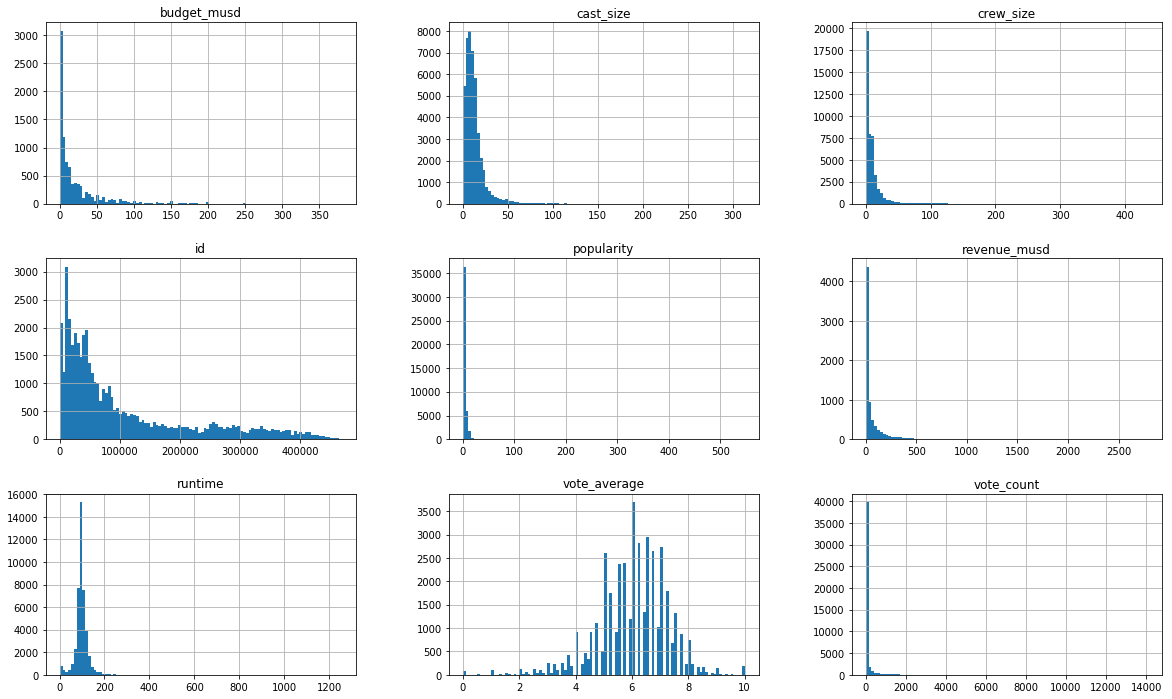

In [ ]:
df.hist(figsize=(20,12), bins=100);

In [ ]:
df.budget_musd.value_counts(dropna=False).head(20)

nan      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
0.50       141
35.00      141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64

In [ ]:
df.revenue_musd.value_counts()

12.00     20
10.00     19
11.00     19
2.00      18
6.00      17
5.00      14
0.50      13
8.00      13
14.00     12
0.00      12
7.00      11
1.00      10
20.00     10
3.00      10
0.00       9
4.00       9
1.50       9
30.00      8
25.00      8
16.00      8
4.10       8
2.50       8
15.00      8
18.00      7
13.00      7
4.30       7
100.00     6
1.30       6
1.40       6
9.00       6
          ..
61.28      1
146.94     1
72.26      1
3.75       1
142.40     1
0.01       1
25.82      1
69.96      1
0.37       1
16.61      1
2.76       1
2.23       1
609.02     1
6.15       1
705.72     1
36.60      1
0.30       1
27.05      1
109.68     1
7.41       1
28.26      1
63.77      1
0.50       1
128.04     1
2.54       1
5.81       1
0.25       1
0.08       1
100.13     1
29.39      1
Name: revenue_musd, Length: 6850, dtype: int64

In [ ]:
df.isnull().mean()*100

id                       0.00
title                    0.00
tagline                 54.61
release_date             0.08
genres                   4.71
belongs_to_collection   90.01
original_language        0.02
budget_musd             80.19
revenue_musd            83.48
production_companies    25.36
production_countries    13.10
vote_count               0.00
vote_average             5.85
popularity               0.00
runtime                  3.38
overview                 2.13
spoken_languages         8.05
poster_path              0.50
cast                     4.90
cast_size                0.00
crew_size                0.00
director                 1.64
dtype: float64

In [ ]:
df.describe(include='object').transpose()

,count,unique,top,freq
title,44691,41605,Cinderella,11
tagline,20284,20171,Based on a true story.,7
genres,42586,4044,Drama,4935
belongs_to_collection,4463,1691,The Bowery Boys,29
original_language,44681,89,en,31755
production_companies,33356,22537,Metro-Goldwyn-Mayer (MGM),741
production_countries,38835,2377,United States of America,17723
overview,43740,43715,Adaptation of the Jane Austen novel.,3
spoken_languages,41094,1828,English,22189
poster_path,44467,44456,<img src='http://image.tmdb.org/t/p/w185//qW1oQlOHizRHXZQrpkimYr0oxzn.jpg' style='height:100px;'>,3


In [ ]:
df[df['title']=='Cinderella'].sort_values(by='release_date')

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,nan,nan,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,"A fairy godmother magically turns Cinderella's rags to a beautiful dress, and a pumpkin into a coach. Cinderella goes to the ball, where she meets the Prince - but will she remember to leave befor...",No Language,<img src='http://image.tmdb.org/t/p/w185//cf0gkHnkc8ROtoh1l76BbQupA5Y.jpg' style='height:100px;'>,Georges Méliès|Barral|Bleuette Bernon|Carmely|Jeanne d'Alcy|Depeyrou,6,2,Georges Méliès
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,nan,nan,NaN,United States of America,7.00,5.40,0.36,52.00,"Based on Charles Perrault's fairy tale: Cinderella is mistreated by her stepmother and stepsisters, but she is able to go to the Royal Ball with the help of the Fairy Godmother.",English,<img src='http://image.tmdb.org/t/p/w185//bL1KRxr9lEBETO8pyR6Kxbmc0W0.jpg' style='height:100px;'>,Mary Pickford|Owen Moore|Isabel Vernon|Georgia Wilson|Lucille Carney|W.N. Cone|Inez Marcel,7,2,James Kirkwood
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,nan,nan,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" brilliantly adapted by Yevgeni Shvarts.",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41rDBxyILHWP8QO2usjR2GTUyE.jpg' style='height:100px;'>,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevskaya|Erast Garin|Vasiliy Merkurev|Sergei Filippov,6,4,Nadezhda Kosheverova
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,"Cinderella has faith her dreams of a better life will come true. With help from her loyal mice friends and a wave of her Fairy Godmother's wand, Cinderella's rags are magically turned into a glori...",English,<img src='http://image.tmdb.org/t/p/w185//avz6S9HYWs4O8Oe4PenBFNX4uDi.jpg' style='height:100px;'>,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna Felton|Helene Stanley|James MacDonald|Luis van Rooten|Don Barclay|Claire Du Brey|Rhoda Williams|Marion Darlington,11,50,Clyde Geronimi
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,nan,nan,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic fairy tale that featured a Rodgers and Hammerstein score and was performed in front of a live audience.,English,<img src='http://image.tmdb.org/t/p/w185//cB6IcSFRpGhUuud8dh2P9XBPtGn.jpg' style='height:100px;'>,Julie Andrews|Howard Lindsay|Howard Lindsay|Ilka Chase|Kaye Ballard|Alice Ghostley|Edie Adams|John Cypher|David F. Perkins,9,10,Ralph Nelson
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,nan,nan,Walt Disney Television|Citadel Entertainment|Storyline Entertainment|BrownHouse Productions,United States of America,28.00,6.10,2.10,88.00,"Updated version of the classic Rodgers and Hammerstein musical of the classic fairy-tale, with an all-star, multi-racial cast.",English,<img src='http://image.tmdb.org/t/p/w185//54awQrtekrsI11bKg2NwQrBHLIe.jpg' style='height:100px;'>,Brandy Norwood|Whitney Houston|Whoopi Goldberg|Bernadette Peters|Jason Alexander,5,1,Robert Iscove
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,nan,nan,NaN,NaN,5.00,5.60,1.09,90.00,"Cinderella (named Zezolla) and her family live mid 20th century, where fashion is practically everything. As her father is won over by a selfish woman named Claudette, Cinderella must keep her new...",English,<img src='http://image.tmdb.org/t/p/w185//gMYkSooSEr8bw4zbAkJf7HCN36x.jpg' style='height:100px;'>,Kathleen Turner|Katrin Cartlidge|David Warner|Jane Birkin|Lucy Punc

### Exploring the BEST (and worst) movies

In [ ]:
from IPython.display import HTML

In [ ]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd',
   'vote_count', 'vote_average', 'popularity']].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,nan,nan,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39
5,<img src='http://image.tmdb.org/t/p/w185//lbf2ueoiEfKIJr2qlT01zIEckbC.jpg' style='height:100px;'>,Heat,60.00,187.44,1886.00,7.70,17.92
6,<img src='http://image.tmdb.org/t/p/w185//z1oNjotUI7D06J4LWQFQzdIuPnf.jpg' style='height:100px;'>,Sabrina,58.00,nan,141.00,6.20,6.68
7,<img src='http://image.tmdb.org/t/p/w185//6yoxUnUnWVmWkrRBPCAFARctZDF.jpg' style='height:100px;'>,Tom and Huck,nan,nan,45.00,5.40,2.56
8,<img src='http://image.tmdb.org/t/p/w185//gV1VTRjT0hFjUxvs6vmfjR1ueoP.jpg' style='height:100px;'>,Sudden Death,35.00,64.35,174.00,5.50,5.23
9,<img src='http://image.tmdb.org/t/p/w185//z0ljRnNxIO7CRBhLEO0DvLgAFPR.jpg' style='height:100px;'>,GoldenEye,58.00,352.19,1194.00,6.60,14.69


In [ ]:
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df_best.columns

Index(['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count',
       'vote_average', 'popularity', 'profit_musd', 'return'],
      dtype='object')

In [ ]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes",
                  "Average Rating", "Popularity", "Profit", "ROI"]

In [ ]:
df_best.set_index("Title", inplace=True)

In [ ]:
df_best

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,nan,nan,92.00,6.50,11.71,nan,nan
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,nan,76.58,173.00,5.70,8.39,nan,nan
Heat,<img src='http://image.tmdb.org/t/p/w185//lbf2ueoiEfKIJr2qlT01zIEckbC.jpg' style='height:100px;'>,60.00,187.44,1886.00,7.70,17.92,127.44,3.12
Sabrina,<img src='http://image.tmdb.org/t/p/w185//z1oNjotUI7D06J4LWQFQzdIuPnf.jpg' style='height:100px;'>,58.00,nan,141.00,6.20,6.68,nan,nan
Tom and Huck,<img src='http://image.tmdb.org/t/p/w185//6yoxUnUnWVmWkrRBPCAFARctZDF.jpg' style='height:100px;'>,nan,nan,45.00,5.40,2.56,nan,nan
Sudden Death,<img src='http://image.tmdb.org/t/p/w185//gV1VTRjT0hFjUxvs6vmfjR1ueoP.jpg' style='height:100px;'>,35.00,64.35,174.00,5.50,5.23,29.35,1.84


In [ ]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [ ]:
subset = df_best.iloc[:5, :2]
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,nan
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,nan


In [ ]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,nan
Waiting to Exhale,,16.00
Father of the Bride Part II,,nan


In [ ]:
df_best.sort_values(by='Average Rating', ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,nan,nan,1.00,10.00,0.04,nan,nan
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2YxgYSJTcloGTHAA9ogOVq7M.jpg' style='height:100px;'>,nan,nan,1.00,10.00,0.32,nan,nan
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifPBA4AjRQWxgVJAwSwWp6nFCa.jpg' style='height:100px;'>,nan,nan,1.00,10.00,0.04,nan,nan
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOcmIjI8sx9RZIsVgOlq4kQgJ4.jpg' style='height:100px;'>,nan,nan,1.00,10.00,1.78,nan,nan
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH5tKdJa3y5jqAQM1eYmkXbHX.jpg' style='height:100px;'>,nan,nan,2.00,10.00,0.48,nan,nan
Avetik,<img src='http://image.tmdb.org/t/p/w185//cyc8sQev5snP1IrqbsmYylGhQss.jpg' style='height:100px;'>,nan,nan,3.00,10.00,0.15,nan,nan
Acéphale,<img src='http://image.tmdb.org/t/p/w185//b6psasyzkx2AN6uHYxvwGQEhdYG.jpg' style='height:100px;'>,nan,nan,1.00,10.00,0.05,nan,nan
Symphony of the Soil,<img src='http://image.tmdb.org/t/p/w185//2ECOJwW7BvlH5w4sQf3nni4MqGv.jpg' style='height:100px;'>,nan,nan,1.00,10.00,0.05,nan,nan
Titus Andronicus,<img src='http://image.tmdb.org/t/p/w185//p74sEGijnqHALAIDDyInOH1wTWC.jpg' style='height:100px;'>,nan,nan,1.00,10.00,0.23,nan,nan


In [ ]:
df_best.loc[df_best.Budget>=5].sort_values(by="ROI",ascending=False)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfkE3HSH1NOyy1ftxlPw2l3ukb.jpg' style='height:100px;'>,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2GJqWS9Ro4JdfV6FP87v3etE.jpg' style='height:100px;'>,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg' style='height:100px;'>,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xcqSFfT6F7ZXHxowjxfG0yisT.jpg' style='height:100px;'>,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwOZXU7ddSrWE3ryOQM8sIg1sZ.jpg' style='height:100px;'>,5.00,328.20,512.00,6.30,7.79,323.20,65.64
The Exorcist,<img src='http://image.tmdb.org/t/p/w185//4ucLGcXVVSVnsfkGtbLY4XAius8.jpg' style='height:100px;'>,8.00,441.31,2046.00,7.50,12.14,433.31,55.16
Get Out,<img src='http://image.tmdb.org/t/p/w185//qbaIViX3tgWSTSFXbldq0ODMdi4.jpg' style='height:100px;'>,5.00,252.43,2978.00,7.20,36.89,247.43,50.49
Four Weddings and a Funeral,<img src='http://image.tmdb.org/t/p/w185//qa72G2VS0bpxms6yo0tI9vsHm2e.jpg' style='height:100px;'>,6.00,254.70,654.00,6.60,8.99,248.70,42.45
Paranormal Activity 3,<img src='http://image.tmdb.org/t/p/w185//zPXAXgD0TTzc7EL0Hx93Iv7B58s.jpg' style='height:100px;'>,5.00,205.70,685.00,5.90,11.00,200.70,41.14


In [ ]:
df_best.Budget.fillna(0, inplace=True)
df_best.Votes.fillna(0, inplace=True)

In [ ]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
                  44467 non-null object
Budget            44691 non-null float64
Revenue           7385 non-null float64
Votes             44691 non-null float64
Average Rating    42077 non-null float64
Popularity        44691 non-null float64
Profit            5371 non-null float64
ROI               5371 non-null float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [ ]:
# Let's create a little helper function that will return the best and worst movies

def best_worst(n, by, ascending=False, min_bud=0, min_votes=0):
    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes),
                     ["", by]].sort_values(by = by, ascending=ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

In [ ]:
# Top 5 Movies - Highest Revnenue
best_worst(n = 5, by='Revenue')

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


In [ ]:
# Top 5 Movies - Highest Budget
best_worst(n = 5, by="Budget")

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


In [ ]:
# Top Profit
best_worst(5, "Profit")

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


In [ ]:
# Lowest Profit
best_worst(5, by="Profit", ascending=True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


In [ ]:
# Top 5 Highest ROI
best_worst(5, 'ROI', ascending=False)

,,ROI
Title,,
Less Than Zero,,12396383.00
Modern Times,,8500000.00
Welcome to Dongmakgol,,4197476.62
Aquí Entre Nos,,2755584.00
"The Karate Kid, Part II",,1018619.28


### Which movie should we watch next?

In [ ]:
df.genres[0]

'Animation|Comedy|Family'

In [ ]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
44661    False
44662    False
44663    False
44664    False
44665    False
44666    False
44667    False
44668    False
44669    False
44670    False
44671    False
44672    False
44673    False
44674    False
44675    False
44676    False
44677    False
44678    False
44679    False
44680    False
44681    False
44682    False
44683    False
44684    False
44685    False
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [ ]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [ ]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
44661    False
44662    False
44663      NaN
44664    False
44665    False
44666    False
44667    False
44668    False
44669    False
44670    False
44671    False
44672    False
44673      NaN
44674    False
44675    False
44676    False
44677      NaN
44678    False
44679    False
44680    False
44681    False
44682    False
44683    False
44684    False
44685    False
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [ ]:
df.loc[mask_actor & mask_genres, ['title', 'vote_average']].sort_values(by = 'vote_average',
                                                                       ascending=False)

,title,vote_average
1448,The Fifth Element,7.30
19218,Looper,6.60
1786,Armageddon,6.50
14135,Surrogates,5.90
20333,G.I. Joe: Retaliation,5.40
27619,Vice,4.10


In [ ]:
bruce = df.loc[mask_actor & mask_genres, ['title', 'poster_path', 'vote_average']].sort_values(by="vote_average",
                                                                                      ascending=False)

In [ ]:
HTML(bruce.to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.30
19218,Looper,,6.60
1786,Armageddon,,6.50
14135,Surrogates,,5.90
20333,G.I. Joe: Retaliation,,5.40
27619,Vice,,4.10


### Now let's find the shortest movies with Uma Thurman and directed by Quentin Tarantino

In [ ]:
df.director

0              John Lasseter
1               Joe Johnston
2              Howard Deutch
3            Forest Whitaker
4              Charles Shyer
5               Michael Mann
6             Sydney Pollack
7               Peter Hewitt
8                Peter Hyams
9            Martin Campbell
10                Rob Reiner
11                Mel Brooks
12               Simon Wells
13              Oliver Stone
14              Renny Harlin
15           Martin Scorsese
16                   Ang Lee
17            Allison Anders
18            Steve Oedekerk
19              Joseph Ruben
20          Barry Sonnenfeld
21                 Jon Amiel
22            Richard Donner
23              Victor Salva
24               Mike Figgis
25             Oliver Parker
26       Lesli Linka Glatter
27             Roger Michell
28        Jean-Pierre Jeunet
29               Zhang Yimou
                ...         
44661         Oleg Assadulin
44662               Uwe Boll
44663             Beth David
44664       Di

In [ ]:
mask_director = df.director == 'Quentin Tarantino'

In [ ]:
mask_actor = df.cast.str.contains('Uma Thurman')

In [ ]:
quentin = df.loc[mask_director & mask_actor,
      ['title','poster_path','runtime']].sort_values(by='runtime', ascending=False)

In [ ]:
HTML(quentin.to_html(escape=False))

,title,poster_path,runtime
291,Pulp Fiction,,154.00
7208,Kill Bill: Vol. 2,,136.00
6667,Kill Bill: Vol. 1,,111.00


### Most Successful Pixar Studio Movie between 2010 and 2015

In [ ]:
df.production_companies

0                                                                                                                                                                                        Pixar Animation Studios
1                                                                                                                                                        TriStar Pictures|Teitler Film|Interscope Communications
2                                                                                                                                                                                    Warner Bros.|Lancaster Gate
3                                                                                                                                                                         Twentieth Century Fox Film Corporation
4                                                                                                                                                                   

In [ ]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

In [ ]:
df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
5       1995-12-15
6       1995-12-15
7       1995-12-22
8       1995-12-22
9       1995-11-16
10      1995-11-17
11      1995-12-22
12      1995-12-22
13      1995-12-22
14      1995-12-22
15      1995-11-22
16      1995-12-13
17      1995-12-09
18      1995-11-10
19      1995-11-21
20      1995-10-20
21      1995-10-27
22      1995-10-06
23      1995-10-27
24      1995-10-27
25      1995-12-15
26      1995-10-20
27      1995-09-27
28      1995-05-16
29      1995-04-30
           ...    
44661   2010-03-25
44662   2010-01-01
44663   2017-06-01
44664   2015-04-02
44665   1944-06-01
44666   2007-01-08
44667   2002-03-07
44668   1901-01-01
44669   1905-01-01
44670   1906-01-01
44671   1909-01-01
44672   1904-03-05
44673   1904-01-01
44674   2005-09-13
44675   1900-01-01
44676   1900-01-01
44677   1981-01-01
44678   2017-07-07
44679   2015-01-11
44680   1972-01-01
44681   1946-03-29
44682   2000

In [ ]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [ ]:
pixar = df.loc[mask_studio & mask_time,
              ['title','poster_path','revenue_musd','release_date']].sort_values(by='revenue_musd', ascending=False)

In [ ]:
HTML(pixar.to_html(escape=False))

,title,poster_path,revenue_musd,release_date
15236,Toy Story 3,,1066.97,2010-06-16
29957,Inside Out,,857.61,2015-06-09
20888,Monsters University,,743.56,2013-06-20
17220,Cars 2,,559.85,2011-06-11
18900,Brave,,538.98,2012-06-21
30388,The Good Dinosaur,,331.93,2015-11-14
16392,Day & Night,,nan,2010-06-17
21694,The Blue Umbrella,,nan,2013-02-12
21697,Toy Story of Terror!,,nan,2013-10-15
22489,La luna,,nan,2011-01-01


### Action or Thriller Movie with original language in English and Minimum Rating of 7.5 (most recent)

In [ ]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [ ]:
mask_lan = df.original_language == 'en'

In [ ]:
mask_vote_av = df.vote_average >= 7.5

In [ ]:
mask_vote_co = df.vote_count >= 10

In [ ]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co,
                  ['title', 'poster_path', 'genres', 'vote_average', 'vote_count', 'release_date']].sort_values(by="release_date", ascending=False).set_index("title")

In [ ]:
HTML(next_mov.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28
The Thinning,,Thriller,7.60,92.00,2016-10-12
11.22.63,,Drama|History|Thriller,8.00,213.00,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.50,7993.00,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.80,12.00,2015-11-09


### What are the most common words in movie titles and taglines?

In [ ]:
from wordcloud import WordCloud

In [ ]:
df.title[1]

'Jumanji'

In [ ]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [ ]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [ ]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [ ]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [ ]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [ ]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [ ]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words=200).generate(title_corpus)
title_wordcloud

(-0.5, 3999.5, 1999.5, -0.5)

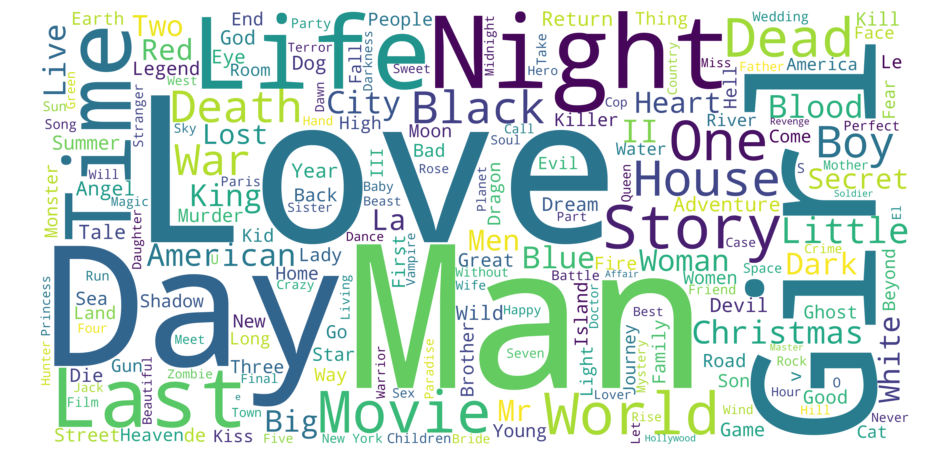

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 3999.5, 1999.5, -0.5)

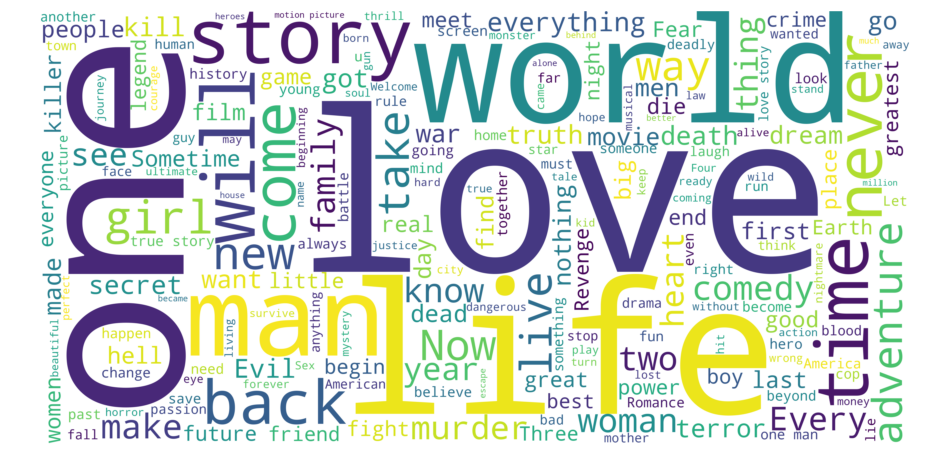

In [ ]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud,interpolation="bilinear")
plt.axis("off")

(-0.5, 3999.5, 1999.5, -0.5)

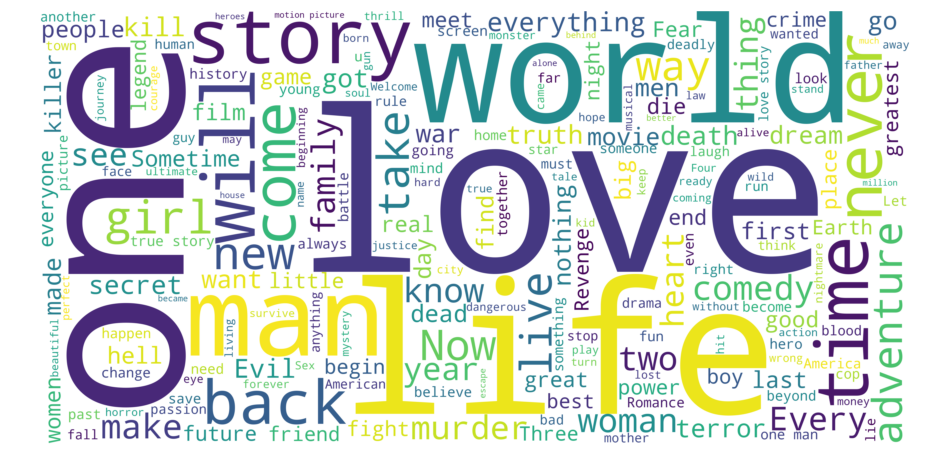

In [ ]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation="bilinear")
plt.axis("off")

### Are Franchises more successful?

In [ ]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
5                                   NaN
6                                   NaN
7                                   NaN
8                                   NaN
9                 James Bond Collection
10                                  NaN
11                                  NaN
12                     Balto Collection
13                                  NaN
14                                  NaN
15                                  NaN
16                                  NaN
17                                  NaN
18               Ace Ventura Collection
19                                  NaN
20              Chili Palmer Collection
21                                  NaN
22                                  NaN
23                                  NaN
24                                  NaN


In [ ]:
df['Franchise'] = df.belongs_to_collection.notna()

In [ ]:
df.Franchise.value_counts()

False    40228
True      4463
Name: Franchise, dtype: int64

## Franchise vs. Stand-alone: Average Revenue

In [ ]:
df.groupby('Franchise').revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

## Franchise vs. Stand-alone: Return on Investment/Profitability

In [ ]:
df['ROI'] = df.revenue_musd.div(df.budget_musd)

In [ ]:
df.groupby('Franchise').ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

## Franchise vs. Stand-alone: Average Budget

In [ ]:
df.groupby('Franchise').budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

## Franchise vs. Stand-alone: Average Popularity

In [ ]:
df.groupby('Franchise').popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

## Franchise vs. Stand-alone: Average Rating

In [ ]:
df.groupby('Franchise').vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [ ]:
df.columns.tolist()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director',
 'Franchise',
 'ROI']

In [ ]:
df.groupby('Franchise').agg({'budget_musd': 'mean', 'revenue_musd':'mean', 'vote_average':'mean',
                            'popularity':'mean', 'ROI':'median', 'vote_count':'mean'})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39




---

